# Create pseudo experiments using simulated compendia

This notebook is a continuation of ```generate_E_GEOD_51409_template_experiment.ipynb```.  This notebook generates new pseudo-experiments using the experiment-preserving approach from the experiment level simulation. In this simulation we are preserving the experiment type but not the actual experiment so the relationship between samples within an experiment are preserved but the genes that are expressed will be different (see module ```simulate_compendium``` in ```functions/generate_data_parallel.py```).

In [1]:
%load_ext autoreload
%autoreload 2

import os
from pathlib import Path
import sys
import ast
import pandas as pd
import numpy as np
import seaborn as sns
import random
import glob
from sklearn import preprocessing

from ponyo import utils, generate_labeled_data

import warnings
warnings.filterwarnings(action='ignore')

from numpy.random import seed
randomState = 123
seed(randomState)

/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Read in config variables
config_file = os.path.abspath(os.path.join(os.getcwd(),"../configs", "config_Pa_experiment_limma.tsv"))
params = utils.read_config(config_file)

In [3]:
# Load parameters
num_runs = 100
dataset_name = params["dataset_name"]
num_simulated_experiments = params["num_simulated_experiments"]
NN_architecture = params["NN_architecture"]
local_dir = params["local_dir"]

In [4]:
# Input files
base_dir = os.path.abspath(
  os.path.join(
      os.getcwd(), "../"))    # base dir on repo

# Load experiment id file
# Contains ALL experiment ids
experiment_ids_file = os.path.join(
    base_dir,
    dataset_name,
    "data",
    "metadata",
    "experiment_ids.txt")

normalized_data_file = os.path.join(
    base_dir,
    dataset_name,
    "data",
    "input",
    "train_set_normalized.pcl")

original_data_file = os.path.join(
    local_dir,
    "pseudo_experiment",
    "Pa_compendium_02.22.2014.pcl")

mapping_file = os.path.join(
    base_dir,
    dataset_name,
    "data",
    "metadata",
    "sample_annotations.tsv")

## Generate simulated data with labels

Simulate a compendia by experiment and label each new sample with the experiment id that it originated from

In [5]:
# Load experiment id file
# Contains ALL experiment ids
base_dir = os.path.abspath(
  os.path.join(
      os.getcwd(), "../"))    # base dir on repo

experiment_ids_file = os.path.join(
    base_dir,
    dataset_name,
    "data",
    "metadata",
    "experiment_ids.txt")

In [6]:
# Generate simulated data
simulated_labeled_data_file = os.path.join(
    local_dir,
    "pseudo_experiment",
    "simulated_data_labeled.txt.xz")
if not Path(simulated_labeled_data_file).exists():
    generate_labeled_data.simulate_compendium_labeled(experiment_ids_file, 
                                                      num_simulated_experiments,
                                                      normalized_data_file,
                                                      NN_architecture,
                                                      dataset_name,
                                                      local_dir,
                                                      base_dir)

## Process data

In [7]:
# Load simulated data
simulated_data_file = os.path.join(
    local_dir,
    "pseudo_experiment",
    "simulated_data_labeled.txt.xz")

In [8]:
# Read data
original_data = pd.read_table(
    original_data_file,
    header=0,
    sep='\t',
    index_col=0).T

simulated_data = pd.read_table(
    simulated_data_file,
    header=0,
    sep='\t',
    index_col=0)

print(original_data.shape)
print(simulated_data.shape)

(950, 5549)
(5346, 5550)


In [9]:
original_data.head(5)

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
05_PA14000-4-2_5-10-07_S2.CEL,9.620090,10.575783,9.296287,9.870074,8.512268,7.903954,7.039473,10.209826,9.784684,5.485688,...,7.740609,9.730384,10.516061,10.639916,9.746849,5.768592,9.224442,11.512176,12.529719,11.804896
54375-4-05.CEL,9.327996,10.781977,9.169988,10.269239,7.237999,7.663758,6.855194,9.631573,9.404465,5.684067,...,7.127736,9.687607,10.199612,9.457152,9.318372,5.523898,7.911031,10.828271,11.597643,11.268520
AKGlu_plus_nt_7-8-09_s1.CEL,9.368599,10.596248,9.714517,9.487155,7.804147,7.681754,6.714411,9.497601,9.523126,5.766331,...,7.343241,9.717993,10.419979,10.164667,10.305005,5.806817,8.575730,10.858250,12.255953,11.309662
anaerobic_NO3_1.CEL,9.083292,9.897050,8.068471,7.310218,6.723634,7.141148,8.492302,7.740717,7.640251,5.267993,...,7.374740,8.287819,9.437053,8.936576,9.418147,5.956482,7.481406,7.687985,9.205525,9.395773
anaerobic_NO3_2.CEL,8.854901,9.931392,8.167126,7.526595,6.864015,7.154523,8.492109,7.716687,7.268094,5.427256,...,7.425398,8.588969,9.313851,8.684602,9.272818,5.729479,7.699086,7.414436,9.363494,9.424762


In [10]:
simulated_data.head(5)

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570,experiment_id
0,0.649,0.707,0.453,0.678,0.305,0.465,0.375,0.544,0.437,0.403,...,0.497,0.673,0.509,0.645,0.174,0.462,0.229,0.508,0.687,E-MEXP-2606_0
1,0.622,0.690,0.438,0.676,0.323,0.500,0.362,0.551,0.445,0.353,...,0.511,0.640,0.516,0.644,0.188,0.487,0.264,0.524,0.678,E-MEXP-2606_0
2,0.641,0.703,0.451,0.671,0.325,0.458,0.370,0.549,0.449,0.387,...,0.512,0.684,0.523,0.655,0.169,0.453,0.256,0.538,0.695,E-MEXP-2606_0
3,0.573,0.650,0.402,0.692,0.301,0.533,0.369,0.573,0.432,0.299,...,0.534,0.534,0.494,0.622,0.227,0.529,0.303,0.489,0.647,E-MEXP-2606_0
4,0.617,0.676,0.459,0.665,0.334,0.469,0.368,0.545,0.442,0.351,...,0.527,0.679,0.529,0.647,0.186,0.459,0.289,0.553,0.686,E-MEXP-2606_0


In [11]:
# 0-1 normalize per gene
scaler = preprocessing.MinMaxScaler()
original_data_scaled = scaler.fit_transform(original_data)
original_data_scaled_df = pd.DataFrame(original_data_scaled,
                                columns=original_data.columns,
                                index=original_data.index)

original_data_scaled_df.head(5)

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
05_PA14000-4-2_5-10-07_S2.CEL,0.853357,0.725280,0.640617,0.811465,0.694460,0.533958,0.158865,0.889579,0.884945,0.176558,...,0.466871,0.702785,0.790965,0.893249,0.789939,0.164157,0.970470,0.887472,0.900484,0.880012
54375-4-05.CEL,0.778790,0.767873,0.614859,0.907865,0.398800,0.460849,0.113876,0.761351,0.801740,0.222709,...,0.352020,0.694387,0.733186,0.639074,0.681204,0.110301,0.619554,0.747656,0.749893,0.805374
AKGlu_plus_nt_7-8-09_s1.CEL,0.789155,0.729508,0.725913,0.718989,0.530160,0.466327,0.079507,0.731643,0.827707,0.241847,...,0.392405,0.700352,0.773422,0.791118,0.931585,0.172570,0.797148,0.753785,0.856253,0.811099
anaerobic_NO3_1.CEL,0.716320,0.585079,0.390211,0.193248,0.279456,0.301781,0.513547,0.342051,0.415668,0.125914,...,0.398308,0.419574,0.593955,0.527203,0.706524,0.205510,0.504767,0.105662,0.363409,0.544780
anaerobic_NO3_2.CEL,0.658015,0.592172,0.410331,0.245504,0.312028,0.305852,0.513499,0.336723,0.334226,0.162965,...,0.407801,0.478697,0.571460,0.473054,0.669643,0.155548,0.562927,0.049738,0.388931,0.548814


In [12]:
# Re-scale simulated data back into the same range as the original data
simulated_data_numeric = simulated_data.drop(columns=['experiment_id'])
simulated_data_scaled = scaler.inverse_transform(simulated_data_numeric)

simulated_data_scaled_df = pd.DataFrame(simulated_data_scaled,
                                columns=simulated_data_numeric.columns,
                                index=simulated_data_numeric.index)

simulated_data_scaled_df['experiment_id'] = simulated_data['experiment_id']
simulated_data_scaled_df.head(5)

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570,experiment_id
0,8.819587,10.487285,8.376346,9.317434,6.833727,7.677395,7.924795,8.651416,7.737733,6.459046,...,8.682196,9.869977,8.851870,9.175711,5.813316,7.321338,8.291288,10.100462,10.417829,E-MEXP-2606_0
1,8.713823,10.404987,8.302797,9.309152,6.911305,7.792385,7.871545,8.682983,7.774290,6.244121,...,8.753506,9.689239,8.884444,9.171770,5.876926,7.414908,8.462489,10.199493,10.353151,E-MEXP-2606_0
2,8.788250,10.467921,8.366539,9.288449,6.919925,7.654397,7.904314,8.673964,7.792569,6.390270,...,8.758600,9.930223,8.917017,9.215116,5.790598,7.287653,8.423357,10.286145,10.475320,E-MEXP-2606_0
3,8.521882,10.211342,8.126278,9.375404,6.816487,7.900805,7.900218,8.782193,7.714885,6.012002,...,8.870659,9.108687,8.782070,9.085079,6.054123,7.572106,8.653256,9.982863,10.130371,E-MEXP-2606_0
4,8.694238,10.337211,8.405766,9.263605,6.958714,7.690537,7.896122,8.655925,7.760581,6.235524,...,8.835004,9.902838,8.944937,9.183592,5.867838,7.310110,8.584776,10.378987,10.410642,E-MEXP-2606_0


In [13]:
# Read in metadata
metadata = pd.read_table(
    mapping_file, 
    header=0, 
    sep='\t', 
    index_col=0)

metadata.head()

,sample_name,ml_data_source,description,nucleic_acid,medium,genotype,od,growth_setting_1,growth_setting_2,strain,temperature,treatment,additional_notes,variant_phenotype,abx_marker,biotic_int_lv_2,biotic_int_lv_1
experiment,,,,,,,,,,,,,,,,,
E-GEOD-46947,GSM1141730 1,GSM1141730_PA01_ZnO_PZO_.CEL,Pseudomonas aeruginosa PAO1 LB aerated 5 h wi...,RNA,LB,NaN,NaN,planktonic,aerated,PAO1,37.0,1 mM ZnO nanoparticles,Grown for 5h,NaN,NaN,NaN,NaN
E-GEOD-46947,GSM1141729 1,GSM1141729_PA01_none_PC_.CEL,Pseudomonas aeruginosa PAO1 LB aerated 5 h,RNA,LB,NaN,NaN,planktonic,aerated,PAO1,37.0,NaN,Grown for 5h,NaN,NaN,NaN,NaN
E-GEOD-65882,GSM1608059 1,GSM1608059_Planktonic_1.CEL,PAO1 WT. Planktonic. Rep1,RNA,PBM plus 1 g / L glucose.,WT,0.26,Planktonic,Aerated,PAO1,37.0,NaN,Grown shaking at 200rpm,NaN,NaN,NaN,NaN
E-GEOD-65882,GSM1608060 1,GSM1608060_Planktonic_2.CEL,PAO1 WT. Planktonic. Rep2,RNA,PBM plus 1 g / L glucose.,WT,0.26,Planktonic,Aerated,PAO1,37.0,NaN,Grown shaking at 200rpm,NaN,NaN,NaN,NaN
E-GEOD-65882,GSM1608061 1,GSM1608061_Planktonic_3.CEL,PAO1 WT. Planktonic. Rep3,RNA,PBM plus 1 g / L glucose.,WT,0.26,Planktonic,Aerated,PAO1,37.0,NaN,Grown shaking at 200rpm,NaN,NaN,NaN,NaN


In [14]:
map_experiment_sample = metadata[['sample_name', 'ml_data_source']]
map_experiment_sample.head()

,sample_name,ml_data_source
experiment,,
E-GEOD-46947,GSM1141730 1,GSM1141730_PA01_ZnO_PZO_.CEL
E-GEOD-46947,GSM1141729 1,GSM1141729_PA01_none_PC_.CEL
E-GEOD-65882,GSM1608059 1,GSM1608059_Planktonic_1.CEL
E-GEOD-65882,GSM1608060 1,GSM1608060_Planktonic_2.CEL
E-GEOD-65882,GSM1608061 1,GSM1608061_Planktonic_3.CEL


In [15]:
map_sample_description = metadata[['ml_data_source', 'description']]
map_sample_description.set_index('ml_data_source', inplace=True)
map_sample_description.head()

,description
ml_data_source,
GSM1141730_PA01_ZnO_PZO_.CEL,Pseudomonas aeruginosa PAO1 LB aerated 5 h wi...
GSM1141729_PA01_none_PC_.CEL,Pseudomonas aeruginosa PAO1 LB aerated 5 h
GSM1608059_Planktonic_1.CEL,PAO1 WT. Planktonic. Rep1
GSM1608060_Planktonic_2.CEL,PAO1 WT. Planktonic. Rep2
GSM1608061_Planktonic_3.CEL,PAO1 WT. Planktonic. Rep3


# Template experiment E-GEOD-21704

This experiment measures the transcriptome of WT and ndk1 mutant *P. aeruginosa* in the presence of exposure to H_2O_2 and polymorphonuclear neutrophils (PMNs), which kill *P. aeruginosa*. 

More information can be found on the [corresponding array express site](https://www.ebi.ac.uk/arrayexpress/experiments/E-GEOD-21704/)

Since this experiment contains multiple different comparisons, to show the consistency between the orginal and the simulated experiment, we performed a hierarchal clustering of the expression data.

In [16]:
# Get experiment id
experiment_id = 'E-GEOD-21704'

In [17]:
# Output files
heatmap_original_file = os.path.join(
    base_dir,
    "Pseudomonas",
    "results",
    "DE_heatmap_original_"+experiment_id+"_example.svg")

heatmap_simulated_file = os.path.join(
    base_dir,
    "Pseudomonas",
    "results",
    "DE_heatmap_simulated_"+experiment_id+"_example.svg")

In [18]:
# Get original samples associated with experiment_id
selected_mapping = map_experiment_sample.loc[experiment_id]
original_selected_sample_ids = list(selected_mapping['ml_data_source'].values)

selected_original_data = original_data.loc[original_selected_sample_ids]

# Map numeric sample ids to descriptive ids
desc_id = list(map_sample_description.loc[list(selected_original_data.index)]['description'])
selected_original_data.index = desc_id

# downsample columns 
random_subset_genes = random.sample(selected_original_data.columns.tolist(), 50)

selected_original_data = selected_original_data.loc[:,random_subset_genes]
selected_original_data.head(5)

,PA5339,PA1538,PA0984,PA0445,PA2364,PA0490,PA1409,PA5096,PA4386,PA4361,...,PA2323,PA4423,PA0556,PA0980,PA5353,PA1062,PA3742,PA3421,PA5193,PA3920
WT. Planktonic in LB plus H2O2. Rep1,10.766628,5.650848,4.843872,6.821840,6.578744,6.642233,6.901947,6.073833,13.056857,6.719958,...,9.611911,9.494116,6.812397,5.067174,5.780116,6.762005,11.622626,5.678187,8.505900,6.186391
WT. Planktonic in LB plus H2O2. Rep2,10.614851,5.481133,5.019911,6.829269,6.742808,6.562918,6.979933,6.076888,13.232889,6.799296,...,9.651966,9.359287,6.653037,5.078473,5.764224,6.619947,11.475703,5.722589,8.520595,6.006725
"WT. Planktonic in RPMI 1640, exposed to PMN exoproducts. Rep1",9.699851,5.920621,4.902690,7.015822,7.547658,8.038159,5.963467,6.127525,12.519512,7.064506,...,9.108200,8.522506,6.296468,5.251765,6.051681,6.845697,9.234404,5.734133,6.741023,8.639010
"WT. Planktonic in RPMI 1640, exposed to PMN exoproducts. Rep2",9.491388,6.160969,5.032420,7.437151,7.662930,8.306924,6.128908,6.384225,12.676545,7.077883,...,8.748545,8.254543,6.293171,5.638468,5.852580,7.027133,9.326544,5.688155,6.607699,8.543212
nadK1::tn5. Planktonic in LB plus H2O2. Rep1,9.810416,5.604049,5.049896,7.346292,7.852395,7.211178,6.191362,6.232271,12.557540,6.468942,...,8.948892,8.846936,6.527658,5.113088,6.767515,7.802200,10.598640,5.830719,7.758032,7.981424


In [19]:
# Want to get simulated samples associated with experiment_id
# Since we sampled experiments with replacement, we want to find the first set of samples matching the experiment id
match_experiment_id = ''
for experiment_name in simulated_data_scaled_df['experiment_id'].values:
    if experiment_name.split("_")[0] == experiment_id:
        match_experiment_id = experiment_name 

In [20]:
# Get simulated samples associated with experiment_id
selected_simulated_data = simulated_data_scaled_df[simulated_data_scaled_df['experiment_id'] == match_experiment_id]

# Map sample ids from original data to simulated data
selected_simulated_data.index = original_selected_sample_ids
selected_simulated_data = selected_simulated_data.drop(columns=['experiment_id'])

selected_simulated_data.index = desc_id

selected_simulated_data = selected_simulated_data.loc[:,random_subset_genes]
selected_simulated_data.head(5)

,PA5339,PA1538,PA0984,PA0445,PA2364,PA0490,PA1409,PA5096,PA4386,PA4361,...,PA2323,PA4423,PA0556,PA0980,PA5353,PA1062,PA3742,PA3421,PA5193,PA3920
WT. Planktonic in LB plus H2O2. Rep1,10.665777,6.276922,4.922485,5.681751,6.204241,6.187091,6.527764,6.132315,12.503499,6.572681,...,8.119531,9.931517,6.665078,4.432175,5.804813,7.505992,10.608070,5.648272,8.551968,7.951881
WT. Planktonic in LB plus H2O2. Rep2,10.665777,6.310204,4.902126,5.570651,6.231679,6.233882,6.575207,6.111323,12.624346,6.599832,...,8.198912,9.880822,6.706309,4.469346,5.813511,7.539459,10.685477,5.703412,8.614317,7.729935
"WT. Planktonic in RPMI 1640, exposed to PMN exoproducts. Rep1",8.424978,8.240563,6.652995,6.952459,8.893093,8.133590,6.067568,6.783070,10.328257,7.974373,...,8.546967,7.539629,5.650799,4.647764,6.452825,6.974245,7.645511,6.565610,6.607448,8.032028
"WT. Planktonic in RPMI 1640, exposed to PMN exoproducts. Rep2",8.321743,8.628854,6.810777,7.181603,9.134541,8.400298,5.986915,6.669713,9.791160,8.120312,...,8.846172,7.442847,5.623312,4.722105,6.213626,7.186200,7.286627,6.390163,6.486646,8.216983
nadK1::tn5. Planktonic in LB plus H2O2. Rep1,8.564648,7.153349,5.721573,6.667765,8.915043,7.281997,6.314271,6.573149,11.717995,7.417769,...,9.053783,7.945190,5.790984,4.335532,6.826846,7.264289,8.187357,6.134511,6.841258,8.050523


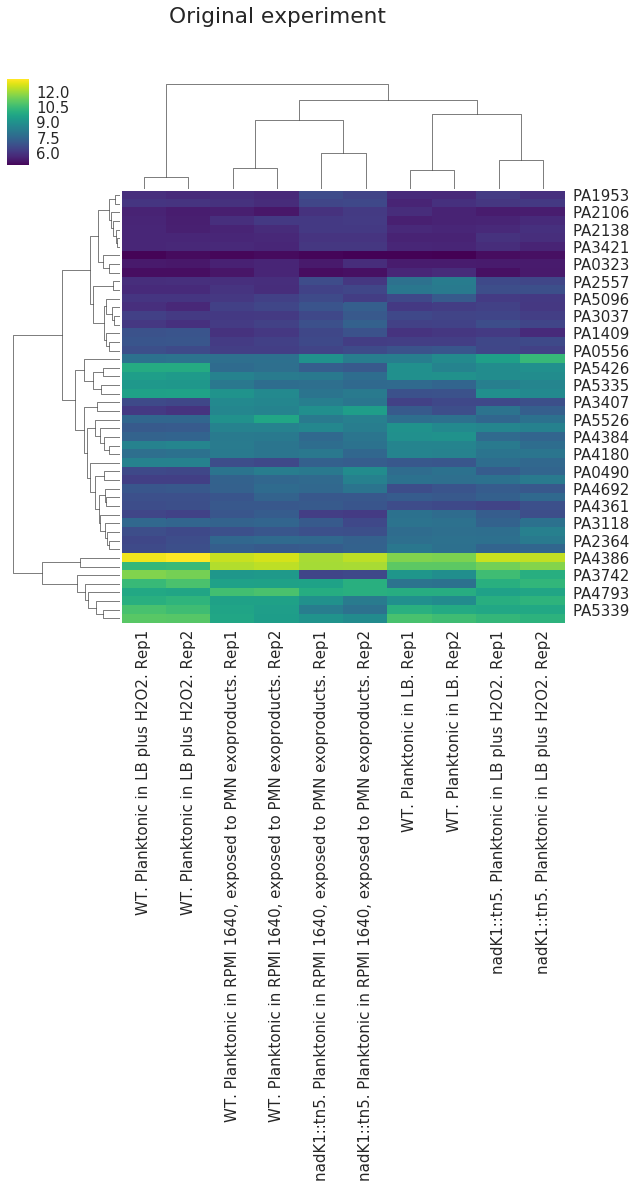

In [21]:
# Plot original data
sns.set(style="ticks", context="talk")
sns.set(font='sans-serif', font_scale=1.5)
f = sns.clustermap(selected_original_data.T, cmap="viridis")
f.fig.suptitle('Original experiment') 
f.savefig(heatmap_original_file)

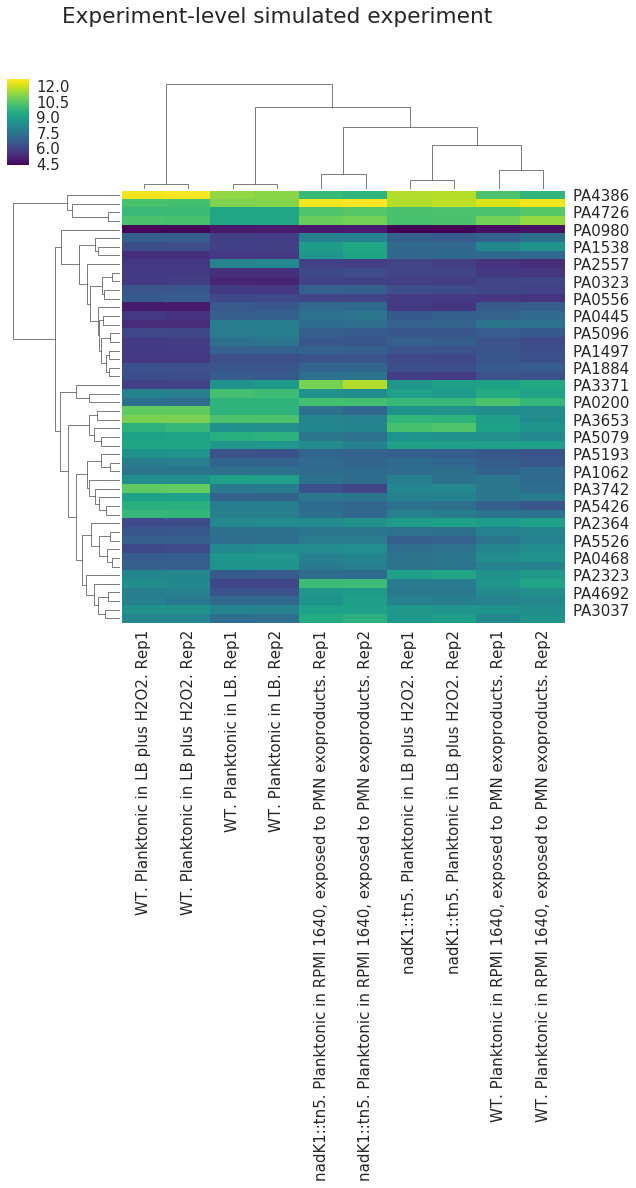

In [22]:
# Plot simulated data
sns.set(style="ticks", context="talk")
sns.set(font='sans-serif', font_scale=1.5)
f = sns.clustermap(selected_simulated_data.T, cmap="viridis")
f.fig.suptitle('Experiment-level simulated experiment')
f.savefig(heatmap_simulated_file)

# Template experiment E-GEOD-10030

This experiment measures the transcriptome of biofilm grown on human cells and planktonic *P. aeruginosa* after treated with Tobramycin, an antibiotic. 

More information can be found on the [corresponding array express site](https://www.ebi.ac.uk/arrayexpress/experiments/E-GEOD-10030/)

Since this experiment contains multiple different comparisons, to show the consistency between the orginal and the simulated experiment, we performed a hierarchal clustering of the expression data.

In [23]:
# Get experiment id
experiment_id = 'E-GEOD-10030'

In [24]:
# Output files
heatmap_original_file = os.path.join(
    base_dir,
    "Pseudomonas",
    "results",
    "DE_heatmap_original_"+experiment_id+"_example.svg")

heatmap_simulated_file = os.path.join(
    base_dir,
    "Pseudomonas",
    "results",
    "DE_heatmap_simulated_"+experiment_id+"_example.svg")

In [25]:
# Get original samples associated with experiment_id
selected_mapping = map_experiment_sample.loc[experiment_id]
original_selected_sample_ids = list(selected_mapping['ml_data_source'].values)

selected_original_data = original_data.loc[original_selected_sample_ids]

# Map numeric sample ids to descriptive ids
uniq_desc = map_sample_description.loc[list(selected_original_data.index)].drop_duplicates()
desc_id = list(uniq_desc['description'])
selected_original_data.index = desc_id

# downsample columns 
random_subset_genes = random.sample(selected_original_data.columns.tolist(), 50)

selected_original_data = selected_original_data.loc[:,random_subset_genes]
selected_original_data.head(5)

,PA1711,PA3189,PA1760,PA4830,PA1092,PA4462,PA1375,PA1962,PA2712,PA1354,...,PA5425,PA1132,PA0521,PA4964,PA0323,PA5386,PA1548,PA5227,PA0604,PA5450
"Pseudomonas aeruginosa 9.5 hour static coculture with human CFBEs, replicate 1",7.741177,5.826768,6.716125,7.131563,11.050909,8.717764,7.536673,6.220414,6.945550,6.890402,...,7.966435,9.156668,6.665653,8.528357,5.946797,7.522134,7.075610,8.986438,7.000748,7.810297
"Pseudomonas aeruginosa 9.5 hour static coculture with human CFBEs, replicate 2",7.751079,5.690258,6.925586,6.514533,11.072227,8.952363,7.761969,5.539150,7.044327,6.095997,...,8.973219,9.021818,6.114346,8.428872,5.542764,7.393870,6.945959,8.981276,6.843942,7.731939
"Pseudomonas aeruginosa 9.5 hour static coculture with human CFBEs, replicate 3",7.532835,5.594239,6.337529,6.662069,11.157499,8.952803,7.963765,5.925770,7.005921,6.496129,...,8.470492,9.246602,6.319500,8.123799,5.712441,6.852863,7.078943,9.317713,6.991634,8.249151
"Pseudomonas aeruginosa 9.5 hour static coculture with human CFBEs treated with tobramycin, replicate 1",8.736205,5.205299,7.201215,7.038272,11.574554,8.164515,8.969539,6.611256,8.845944,6.720675,...,8.395346,9.370790,6.643735,7.191372,5.961399,6.519644,6.955317,10.385081,6.798315,7.617565
"Pseudomonas aeruginosa 9.5 hour static coculture with human CFBEs treated with tobramycin, replicate 2",8.701154,5.057372,6.231457,7.134693,11.447985,7.787004,9.245823,6.227192,8.692339,7.026538,...,8.746130,9.466753,6.484173,7.175658,6.195233,7.247876,7.086591,10.393530,6.628721,6.598382


In [26]:
# Want to get simulated samples associated with experiment_id
# Since we sampled experiments with replacement, we want to find the first set of samples matching the experiment id
match_experiment_id = ''
for experiment_name in simulated_data_scaled_df['experiment_id'].values:
    if experiment_name.split("_")[0] == experiment_id:
        match_experiment_id = experiment_name 

In [27]:
# Get simulated samples associated with experiment_id
selected_simulated_data = simulated_data_scaled_df[simulated_data_scaled_df['experiment_id'] == match_experiment_id]

# Map sample ids from original data to simulated data
selected_simulated_data.index = original_selected_sample_ids
selected_simulated_data = selected_simulated_data.drop(columns=['experiment_id'])

selected_simulated_data.index = desc_id

selected_simulated_data = selected_simulated_data.loc[:,random_subset_genes]
selected_simulated_data.head(5)

,PA1711,PA3189,PA1760,PA4830,PA1092,PA4462,PA1375,PA1962,PA2712,PA1354,...,PA5425,PA1132,PA0521,PA4964,PA0323,PA5386,PA1548,PA5227,PA0604,PA5450
"Pseudomonas aeruginosa 9.5 hour static coculture with human CFBEs, replicate 1",8.362859,5.639197,5.344644,7.555426,10.916374,11.105132,8.541033,6.748796,7.081849,5.039030,...,9.633910,9.171416,5.331122,9.227044,5.809588,7.407388,7.237955,8.991039,7.309382,7.273543
"Pseudomonas aeruginosa 9.5 hour static coculture with human CFBEs, replicate 2",8.369311,5.679290,5.325126,7.398710,11.064818,11.315965,8.600487,6.579994,6.990734,4.979316,...,9.837167,9.392573,5.266731,9.358940,5.729005,7.300605,7.338301,9.257576,7.284903,7.392175
"Pseudomonas aeruginosa 9.5 hour static coculture with human CFBEs, replicate 3",8.246714,5.748021,5.378800,7.424829,11.160870,11.298395,8.584841,6.608127,7.021106,5.027087,...,9.841492,9.409585,5.292487,9.355171,5.762186,7.182582,7.276550,9.327107,7.370580,7.515044
"Pseudomonas aeruginosa 9.5 hour static coculture with human CFBEs treated with tobramycin, replicate 1",9.801766,5.570465,5.652048,8.600201,9.947120,8.908955,9.198164,8.427439,9.160605,5.564514,...,9.119282,9.154404,6.825003,7.290068,6.131923,7.193822,6.369579,9.831208,7.076833,6.693093
"Pseudomonas aeruginosa 9.5 hour static coculture with human CFBEs treated with tobramycin, replicate 2",9.872744,5.541827,5.681324,8.574082,9.999512,8.926525,9.223198,8.394616,9.177478,5.546600,...,9.188476,9.162910,6.831442,7.274994,6.079781,7.132000,6.288531,9.958682,7.021755,6.680383


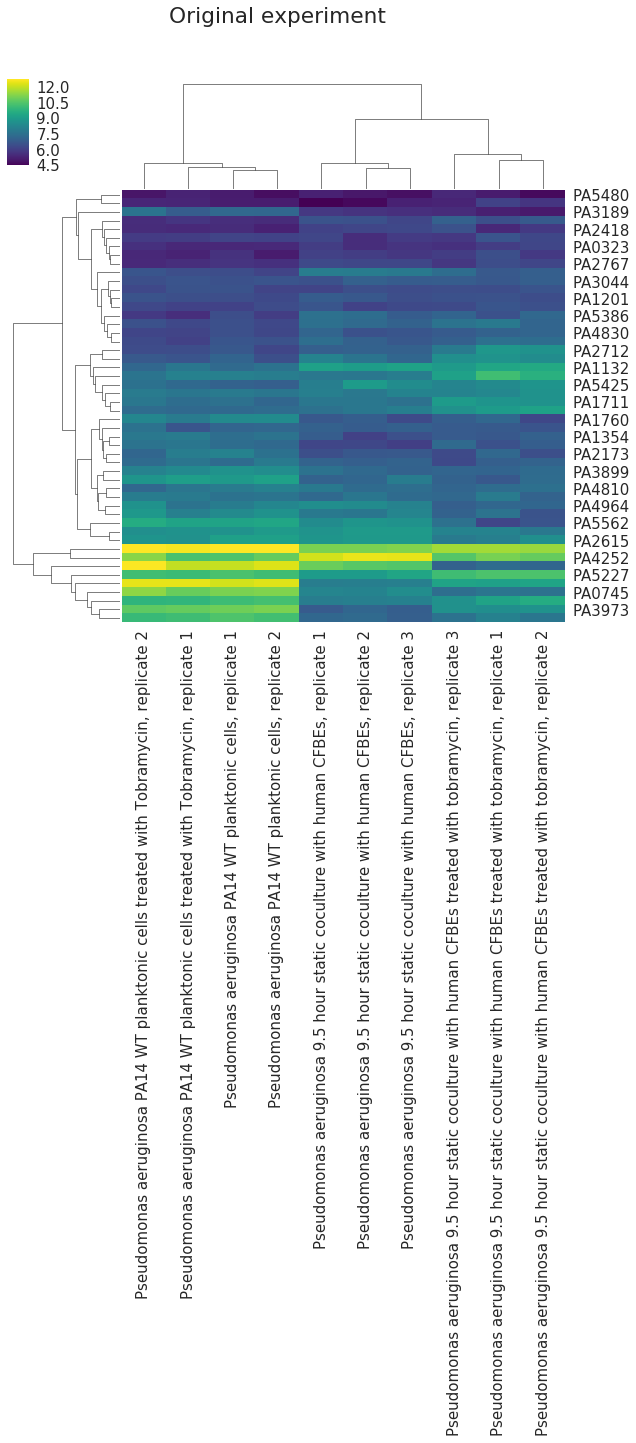

In [28]:
# Plot original data
sns.set(style="ticks", context="talk")
sns.set(font='sans-serif', font_scale=1.5)
f = sns.clustermap(selected_original_data.T, cmap="viridis")
f.fig.suptitle('Original experiment')
f.savefig(heatmap_original_file)

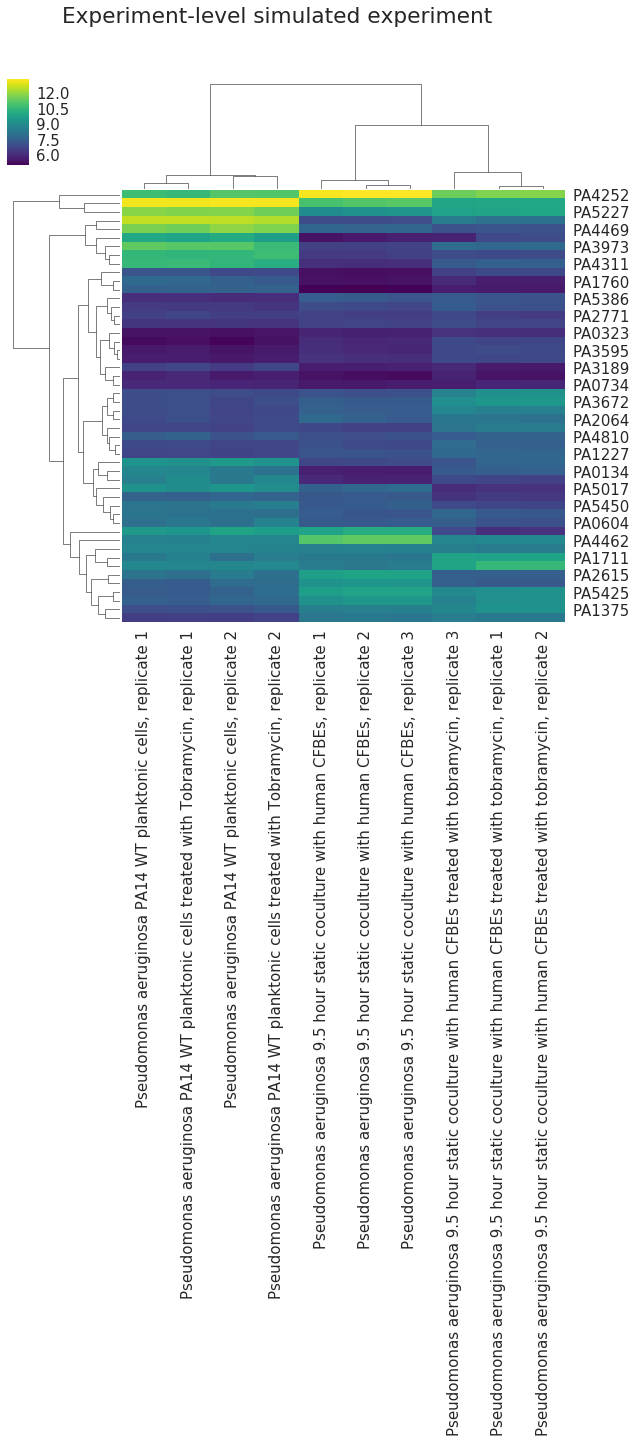

In [29]:
# Plot simulated data
sns.set(style="ticks", context="talk")
sns.set(font='sans-serif', font_scale=1.5)
f = sns.clustermap(selected_simulated_data.T, cmap="viridis")
f.fig.suptitle('Experiment-level simulated experiment')
f.savefig(heatmap_simulated_file)